In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stcl

import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
def remove_box():
    # remove top & right box
    # https://stackoverflow.com/a/28720127
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
# ANOVA
# https://www.pythonfordatascience.org/anova-python/
from scipy import stats
def do_anova(df, col, key='contrast', key_values=[50, 80, 100]):
    return stats.f_oneway(df[col][df[key] == key_values[0]],
                           df[col][df[key] == key_values[1]],
                           df[col][df[key] == key_values[2]])

## run for all cells (OFF LINE)

datasets: Gaussian stim with diffent contrasts

run
```
python3 stcl_batch.py --contrast 50
python3 stcl_batch.py --contrast 80
python3 stcl_batch.py --contrast 100
```

## read clustering results

In [49]:
# contrast = 50
# contrast = 80
contrast = 100

contrasts = [50, 80, 100]
tap = 8 # -700 ms ~ 0
cluster_dim = 2

dfs = []
for contrast in contrasts:

    folder_name = "results/gaussian_stim_contrast{}_tap{}_cluster_dim{}".format(contrast, tap, cluster_dim)
    filename = os.path.join(folder_name, "clusters.csv")

    clusters = pd.read_csv(filename)
    # weights
    # weights.head()

    clusters['contrast'] = contrast
    clusters["max_weight"] = np.maximum(clusters["weight1"], clusters["weight2"])
    
    
    dfs.append(clusters)

    
clusters_all = pd.concat(dfs)
# # combine number of samples
# clusters = clusters.merge(num_samples_df, on="channel_name") #, how="outer")

# # combine largest eigen values
# clusters = clusters.merge(largest_eigen_values_df, on="channel_name", how="outer")


# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

Text(0.5, 1.0, 'ANOVA p=0.00')

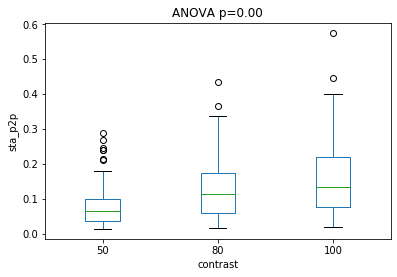

In [50]:
col = 'sta_p2p'
clusters_all.boxplot(col, by='contrast', grid=False)
plt.title(None)
plt.ylabel(col)
# remove_box()

val, p = do_anova(clusters_all, col)
plt.suptitle('')
plt.title ('ANOVA p={:.2f}'.format(p))

# plt.savefig(os.path.join(data_path, 'figure', 'sta_p2p_vs_contrast.png'), dpi=150)

In [44]:
# print(len(clusters_all)/3)
# clusters_all['cell_type'].value_counts()

In [45]:
idx_on = clusters_all['cell_type']=='ON'
idx_off = clusters_all['cell_type']=='OFF'
idx_on_off = clusters_all['cell_type']== 'ON-OFF'



Text(0, 0.5, 'peak to peak')

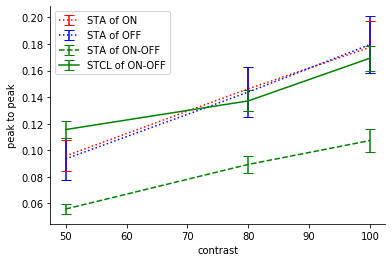

In [87]:
key = 'contrast'
col = 'sta_p2p'

colors = ['r','b','g']
linestyles = [':', ':', '--']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 linestyle=linestyles[i], color=colors[i], capsize=5)

# all centers 
# combine two centers
centers_all = pd.concat([clusters_all[['channel_name', 'cell_type', 'contrast', 'center0_p2p']].rename(columns={'center0_p2p': 'center_p2p'}),
                        clusters_all[['channel_name', 'cell_type', 'contrast', 'center1_p2p']].rename(columns={'center1_p2p': 'center_p2p'})])

idx = centers_all['cell_type'] == 'ON-OFF'

col = 'center_p2p'
plt.errorbar([50, 80, 100], centers_all.loc[idx,:].groupby(key)[col].mean(), centers_all.loc[idx,:].groupby(key)[col].sem(),
             color=colors[i], capsize=5)

# col = 'center0_p2p'
# plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
#              color=colors[i], capsize=5)

# col = 'center1_p2p'
# plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
#              color=colors[i], capsize=5)
    
plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['STA of ON ', 'STA of OFF', 'STA of ON-OFF', 'STCL of ON-OFF'])


# print(do_anova(clusters_all.loc[idx_on,:], col))
# print(do_anova(clusters_all.loc[idx_off,:], col))
# print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

plt.ylabel('peak to peak')

In [64]:
clusters_all.loc[idx,:].groupby(key)[col]

F_onewayResult(statistic=2.4207660458279014, pvalue=0.09307614775879801)
F_onewayResult(statistic=1.5824347478731025, pvalue=0.21600549509949096)
F_onewayResult(statistic=6.386672072933843, pvalue=0.00246149532920223)


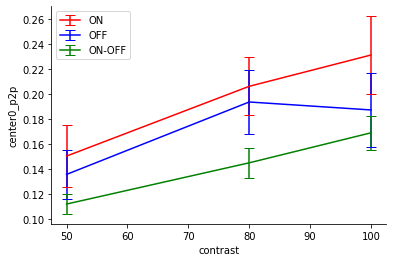

In [52]:
key = 'contrast'
col = 'center0_p2p'

colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON', 'OFF', 'ON-OFF'])


print(do_anova(clusters_all.loc[idx_on,:], col))
print(do_anova(clusters_all.loc[idx_off,:], col))
print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

F_onewayResult(statistic=4.581736949268262, pvalue=0.012045101264005185)
F_onewayResult(statistic=2.5992195854170332, pvalue=0.08476495341884831)
F_onewayResult(statistic=nan, pvalue=nan)


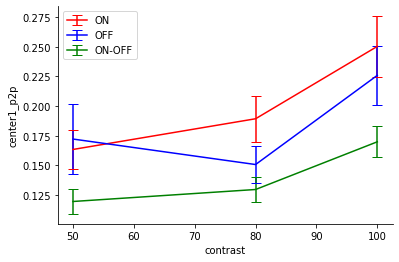

In [53]:
key = 'contrast'
col = 'center1_p2p'

colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON', 'OFF', 'ON-OFF'])


print(do_anova(clusters_all.loc[idx_on,:], col))
print(do_anova(clusters_all.loc[idx_off,:], col))
print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

In [18]:
for group, data in clusters_all.groupby('cell_type', sort=False):
    print(group)
    print(data.mean())

ON-OFF
num_spikes       17201.274510
PSNR                13.460357
eig1                 0.181360
eig2                 0.178351
eig3                 0.176764
converged            1.000000
PSNR1                8.864839
PSNR2                8.912714
weight1              0.498990
weight2              0.501010
inner_product       -0.089334
contrast            76.666667
max_weight           0.512701
dtype: float64
ON
num_spikes       9422.142857
PSNR               13.574817
eig1                0.245225
eig2                0.238583
eig3                0.231678
converged           1.000000
PSNR1               9.338508
PSNR2              10.154210
weight1             0.485116
weight2             0.514884
inner_product      -0.058477
contrast           76.666667
max_weight          0.546682
dtype: float64
OFF
num_spikes       14566.941176
PSNR                16.223746
eig1                 0.197342
eig2                 0.192821
eig3                 0.190266
converged            1.000000
PSNR1    

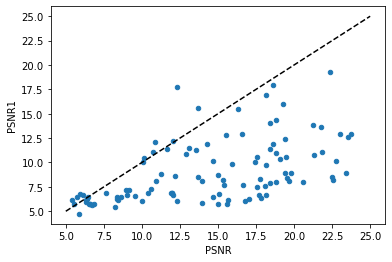

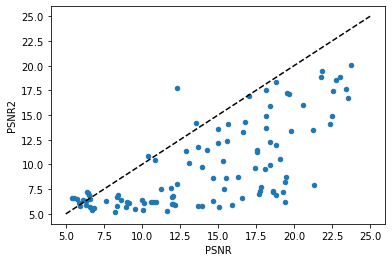

In [3]:
clusters.plot.scatter("PSNR", "PSNR1")
plt.plot([5,25], [5,25], 'k--')
clusters.plot.scatter("PSNR", "PSNR2")
plt.plot([5,25], [5,25], 'k--')

In [4]:
idx_PSNR1_increased = np.where(clusters["PSNR"] < clusters["PSNR1"])
idx_PSNR2_increased = np.where(clusters["PSNR"] < clusters["PSNR2"])

clusters.iloc[np.union1d(idx_PSNR1_increased, idx_PSNR2_increased)]

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight
3,ch_14a,15063,ON,5.548544,0.216538,0.214700,0.213073,True,5.703528,6.621438,0.515243,0.484757,-0.129582,0.515243
5,ch_14c,1674,OFF,6.102290,0.374548,0.359102,0.352098,True,6.674244,6.422845,0.412530,0.587470,-0.003969,0.587470
6,ch_16a,17370,ON,5.748378,0.204920,0.204215,0.203113,True,6.473227,6.552889,0.505866,0.494134,-0.123094,0.505866
7,ch_16b,4286,ON,5.941147,0.264773,0.260863,0.258802,True,6.772580,5.803694,0.507271,0.492729,-0.142963,0.507271
9,ch_17b,7244,ON,6.372851,0.240235,0.234276,0.232704,True,6.261162,7.201459,0.500847,0.499153,-0.137278,0.500847
13,ch_21b,118,ON,5.835811,1.458661,1.346522,1.304296,True,4.736873,6.084891,0.024233,0.975767,0.142326,0.975767
14,ch_21c,744,ON,10.751853,0.589943,0.563145,0.529056,True,11.034902,6.172620,0.958940,0.041060,0.104283,0.958940
15,ch_22a,19525,Unknown,6.460123,0.210698,0.210035,0.208095,True,6.486459,7.158446,0.496603,0.503397,-0.125074,0.503397
20,ch_23c,648,Unknown,6.505765,0.865279,0.749329,0.713250,True,5.705150,6.870633,0.028884,0.971116,0.064206,0.971116
21,ch_24a,16781,ON-OFF,5.418248,0.205294,0.203689,0.202984,True,6.171802,6.653358,0.495766,0.504234,-0.125321,0.504234


In [5]:
clusters.iloc[np.intersect1d(idx_PSNR1_increased, idx_PSNR2_increased)]

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight
3,ch_14a,15063,ON,5.548544,0.216538,0.214700,0.213073,True,5.703528,6.621438,0.515243,0.484757,-0.129582,0.515243
5,ch_14c,1674,OFF,6.102290,0.374548,0.359102,0.352098,True,6.674244,6.422845,0.412530,0.587470,-0.003969,0.587470
6,ch_16a,17370,ON,5.748378,0.204920,0.204215,0.203113,True,6.473227,6.552889,0.505866,0.494134,-0.123094,0.505866
15,ch_22a,19525,Unknown,6.460123,0.210698,0.210035,0.208095,True,6.486459,7.158446,0.496603,0.503397,-0.125074,0.503397
21,ch_24a,16781,ON-OFF,5.418248,0.205294,0.203689,0.202984,True,6.171802,6.653358,0.495766,0.504234,-0.125321,0.504234
75,ch_55b,5218,ON-OFF,12.309477,0.319629,0.289982,0.285660,True,17.696247,17.776556,0.519835,0.480165,-0.170038,0.519835


In [21]:
clusters_with_negative_inner_product = clusters.loc[clusters["inner_product"]<0,:]

print(len(clusters_with_negative_inner_product), len(clusters))
clusters_with_negative_inner_product.sort_values('inner_product').head(20)

90 106


,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight
75,ch_55b,5218,ON-OFF,12.309477,0.319629,0.289982,0.285660,True,17.696247,17.776556,0.519835,0.480165,-0.170038,0.519835
83,ch_65b,3033,ON,8.984958,0.275589,0.272738,0.269600,True,7.170216,5.673973,0.500607,0.499393,-0.145720,0.500607
7,ch_16b,4286,ON,5.941147,0.264773,0.260863,0.258802,True,6.772580,5.803694,0.507271,0.492729,-0.142963,0.507271
104,ch_87b,4306,ON-OFF,9.993480,0.278084,0.276264,0.270771,True,6.094479,6.380246,0.494181,0.505819,-0.138473,0.505819
63,ch_47c,4680,ON,9.169582,0.258002,0.257559,0.253181,True,7.162905,6.128768,0.506424,0.493576,-0.137670,0.506424
9,ch_17b,7244,ON,6.372851,0.240235,0.234276,0.232704,True,6.261162,7.201459,0.500847,0.499153,-0.137278,0.500847
99,ch_83a,15210,ON-OFF,13.669865,0.234655,0.227514,0.226197,True,15.573856,11.739912,0.487534,0.512466,-0.134385,0.512466
85,ch_68b,3009,ON-OFF,9.019019,0.325427,0.316164,0.312361,True,6.662889,6.157092,0.519963,0.480037,-0.133171,0.519963
57,ch_45b,10820,ON,16.313761,0.248769,0.246696,0.245880,True,15.527363,8.701109,0.485267,0.514733,-0.132727,0.514733
96,ch_78b,3044,ON-OFF,10.907295,0.302228,0.294525,0.292668,True,8.063057,6.165498,0.519633,0.480367,-0.132332,0.519633


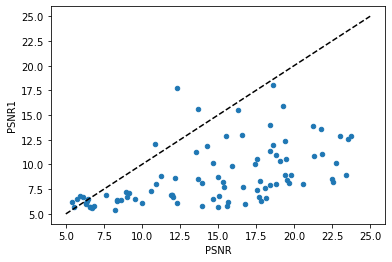

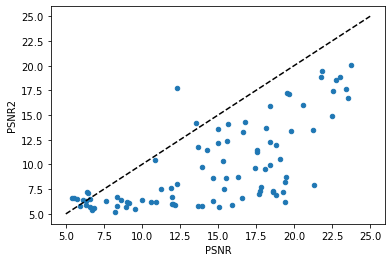

In [7]:
#plt.plot(clusters_with_negative_inner_product[])
clusters_with_negative_inner_product.plot.scatter("PSNR", "PSNR1")
plt.plot([5,25], [5,25], 'k--')
clusters_with_negative_inner_product.plot.scatter("PSNR", "PSNR2")
plt.plot([5,25], [5,25], 'k--')

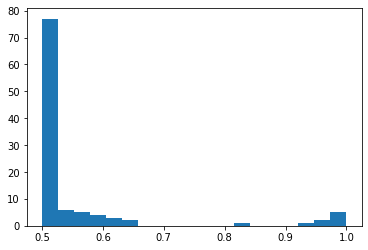

In [8]:
bins = np.linspace(0.5, 1, 20)
plt.hist(clusters["max_weight"], bins=bins)
#clusters["max_weight"].hist()
#plt.
plt.savefig("{}/max_weight_hist.png".format(folder_name))

In [9]:
# clusters["inner_product"].hist()
# plt.savefig("{}/inner_product_hist.png".format(folder_name))

### histogram of  innerproduct for each cell type

In [10]:
## Combine with cell type info
# cell_type = pd.DataFrame({"channel_name": info["channel_names"],
#                           "cell_type":   info["cell_types"]})
# cell_type

# clusters = clusters.merge(cell_type, on="channel_name", how="outer")

# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc392eeae10>,
      dtype=object)

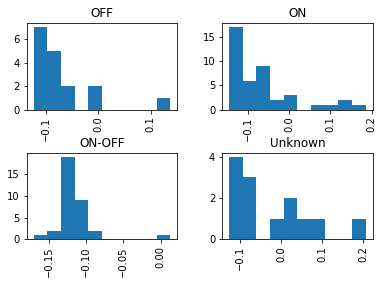

In [11]:
# clusters
#info["cell_types"]
#clusters.groupby("cell_type").hist()
clusters["inner_product"].hist(by=clusters["cell_type"])

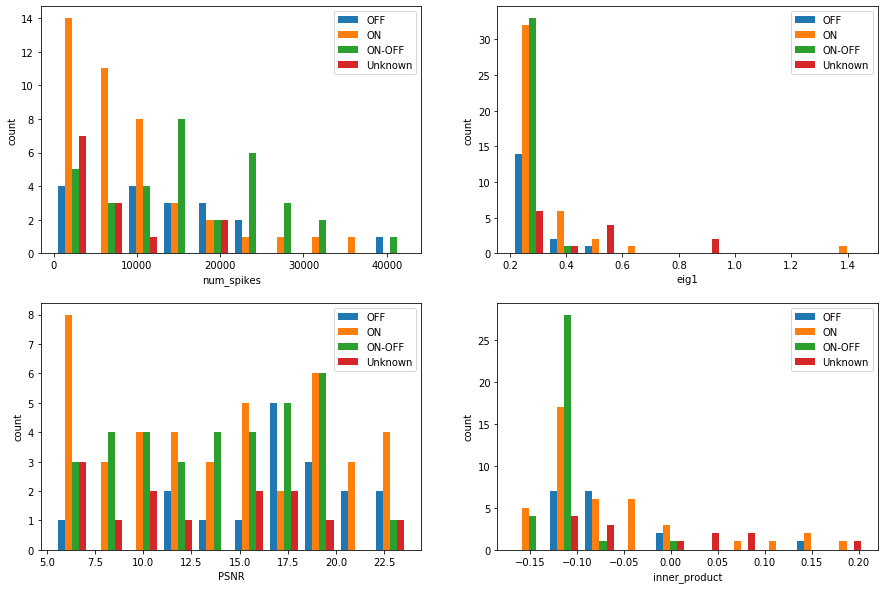

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(221)
# pysta.plot_histogram_by_cell_type(clusters, "num_spikes")
pysta.plot_hist_by_group(clusters, "num_spikes", 'cell_type')
plt.subplot(222)
# pysta.plot_histogram_by_cell_type(clusters, "eig1")
pysta.plot_hist_by_group(clusters, "eig1", 'cell_type')
plt.subplot(223)
# pysta.plot_histogram_by_cell_type(clusters, "PSNR")
pysta.plot_hist_by_group(clusters, "PSNR", 'cell_type')
plt.subplot(224)
pysta.plot_hist_by_group(clusters, "inner_product", 'cell_type')
# pysta.plot_histogram_by_cell_type(clusters, "inner_product")
# pysta.plot_histogram_by_cell_type(clusters, "max_weight")

plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.pdf".format(contrast, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.png".format(contrast, tap, cluster_dim))

## Focus on data with enough samples

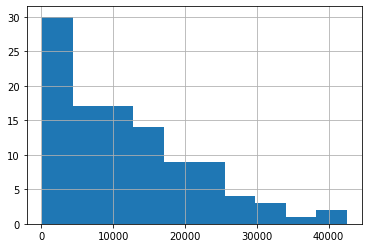

In [13]:
clusters.num_spikes.hist()

88
ON         34
ON-OFF     33
OFF        15
Unknown     6
Name: cell_type, dtype: int64


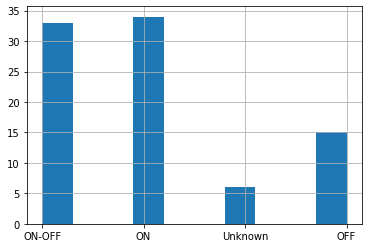

In [14]:
idx_enough_samples = clusters["num_spikes"]>512*4
clusters_with_enough_samples = clusters.loc[idx_enough_samples]

print(len(clusters_with_enough_samples))

print(clusters_with_enough_samples["cell_type"].value_counts())

clusters_with_enough_samples["cell_type"].hist()

In [15]:
idx_unknown = clusters_with_enough_samples["cell_type"]=="unknown"

clusters_with_enough_samples.loc[idx_unknown]

# clusters_with_enough_samples.loc[idx_unknown].to_csv("{}_tap{}_cluster_with_enough_samples_dim{}_unknown.csv".format(dataset_name, tap, dim))

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight


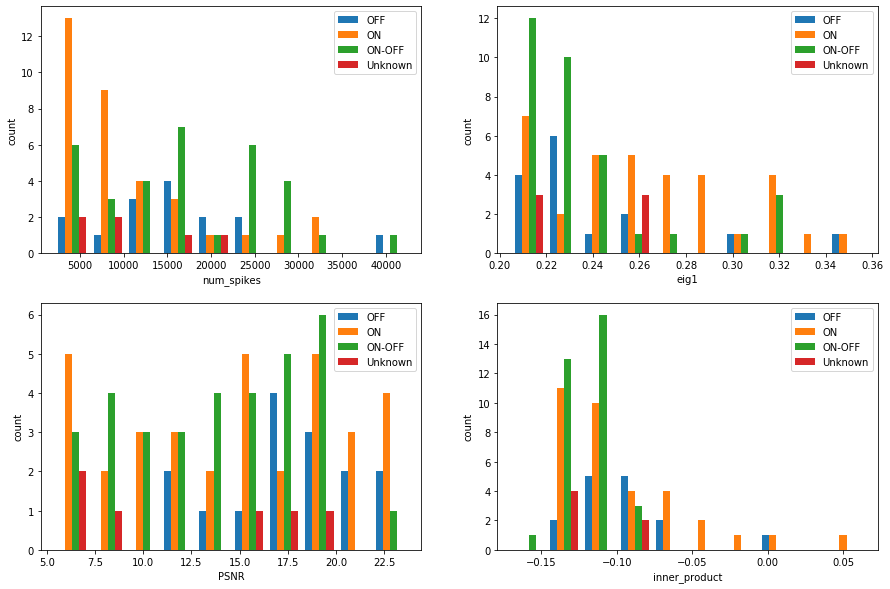

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_group(clusters_with_enough_samples, "num_spikes", 'cell_type')
plt.subplot(222)
pysta.plot_hist_by_group(clusters_with_enough_samples, "eig1", 'cell_type')
plt.subplot(223)
pysta.plot_hist_by_group(clusters_with_enough_samples, "PSNR", 'cell_type')
plt.subplot(224)
pysta.plot_hist_by_group(clusters_with_enough_samples, "inner_product", 'cell_type')

plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.pdf".format(contrast, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.png".format(contrast, tap, cluster_dim))

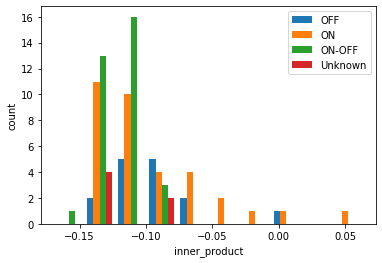

In [17]:
# plot inner product only
pysta.plot_hist_by_group(clusters_with_enough_samples, "inner_product", 'cell_type')
# pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "inner_product")
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.png".format(dataset_name, tap, cluster_dim))
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.pdf".format(dataset_name, tap, cluster_dim))

## paired t-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [18]:
# from scipy import stats

In [19]:
# stats.ttest_rel(clusters_dim2["max_weight"], clusters_dim2["max_weight"])

In [20]:
# stats.ttest_rel(clusters_dim2["inner_product"], clusters_dim2["inner_product"])